In [2]:
import cv2 as cv
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u
from astropy import wcs

In [3]:
cv.getStructuringElement(cv.MORPH_ELLIPSE,(21,21))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
test2 = np.zeros((101, 101), dtype = "int")
x,y = np.ogrid[0:101, 0:101]

#get the x and y center points of our image
center_x = test2.shape[0]//2
center_y = test2.shape[1]//2

#create a circle mask which is centered in the middle of the image, and with radius 10 pixels
circle_mask = (x-center_x)**2 + (y-center_y)**2 <= 50**2

test2[circle_mask] = 1
test2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

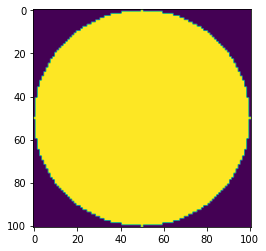

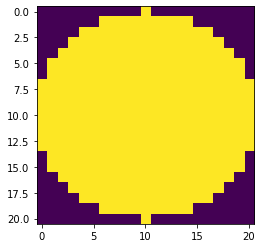

In [5]:
plt.imshow(test2)
plt.show()
plt.imshow(cv.getStructuringElement(cv.MORPH_ELLIPSE,(21,21)))
plt.show()

In [8]:
data = Table.read("all_clusters2.fits").to_pandas()

In [9]:
data

,index,RA_central,DEC_central,z_median_central,z_average_no_wt,z_average_prob,z_average_mass_prob,z_std_central,z_std_no_wt,z_std_prob,...,mass_central,neighbor_mass,local_neighbor_mass,ultra_local_neighbor_mass,correction_factor,neighbors,local_neighbors,ultra_local_neighbors,flag_foreground,flag_duplicate
0,0,291.871958,70.356011,0.243915,0.268894,0.237300,0.237638,0.045789,0.118690,0.067470,...,11.884857,12.804432,12.614048,12.423592,1.556490,59.900000,23.566667,3.833333,0,0
1,1,291.519829,70.026803,0.185048,0.239647,0.205979,0.206249,0.005686,0.116850,0.068662,...,11.441989,12.708811,12.506956,12.062253,1.480884,66.666667,30.033333,3.800000,0,0
2,2,292.528432,71.444574,0.231166,0.298305,0.261360,0.261760,0.007137,0.144636,0.070468,...,11.667529,12.812583,12.535216,12.249222,1.538846,55.466667,22.800000,3.766667,0,0
3,3,290.247186,70.738793,0.128097,0.239640,0.175243,0.175430,0.011426,0.112423,0.074379,...,11.427700,12.590066,12.327607,11.901561,1.421039,74.966667,24.200000,2.433333,0,0
4,4,292.015129,71.653913,0.570930,0.507540,0.538966,0.540066,0.040072,0.145106,0.085271,...,11.496993,12.901103,12.599698,12.299931,2.343073,31.066667,12.200000,3.166667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397382,286520,226.160024,-6.295050,0.577601,0.541742,0.555891,0.556197,0.028520,0.135704,0.087239,...,11.251911,12.651590,12.273620,12.028069,2.368230,25.000000,8.800000,1.800000,0,0
397383,286521,224.694675,-5.868756,0.599006,0.537421,0.602387,0.602873,0.042929,0.126022,0.075797,...,11.338346,12.638918,12.284304,12.133569,2.452336,22.733333,8.333333,2.766667,0,0
397384,286522,227.298830,-6.640361,0.098599,0.202227,0.142521,0.142644,0.027806,0.115118,0.059836,...,11.369233,12.342930,12.024683,11.821319,1.394726,69.900000,23.900000,3.400000,0,0
397385,286523,222.887636,-6.280113,0.162149,0.221109,0.178333,0.178637,0.004129,0.095568,0.067198,...,11.353271,12.472716,12.028245,11.890043,1.455333,63.166667,19.000000,2.933333,0,0


In [10]:
H_uneq, xedges, yedges = np.histogram2d(data.DEC_central, (data.RA_central-300)%360, bins = (np.linspace(np.min(data.DEC_central), np.max(data.DEC_central), 1000), np.linspace(np.min((data.RA_central-300)%360), np.max((data.RA_central-300)%360), 1000)))

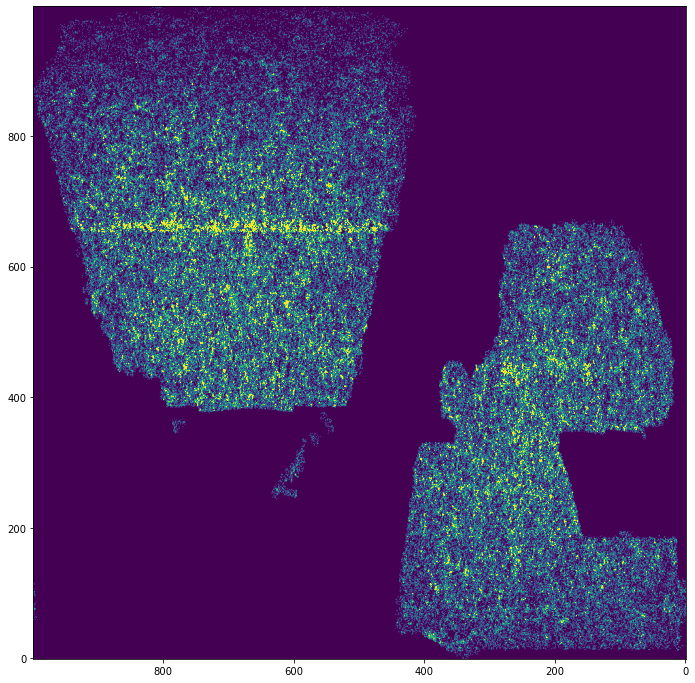

In [11]:
plt.figure(figsize = (12, 12))
plt.imshow(H_uneq, vmax = 3)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [12]:
np.min(data.DEC_central), np.max(data.DEC_central)

(-67.97973664036881, 84.72124174875262)

In [13]:
np.min((data.RA_central-298)%360*np.cos(np.pi/180*data.DEC_central)), np.max((data.RA_central-298)%360*np.cos(np.pi/180*data.DEC_central))

(0.020944224253399348, 321.6664145621279)

In [14]:
H, xedges, yedges = np.histogram2d(data.DEC_central, (data.RA_central-298)%360*np.cos(np.pi/180*data.DEC_central), bins = (np.linspace(-70, 90, 10000), np.linspace(-3, 325, 10000)))

In [15]:
H.shape

(9999, 9999)

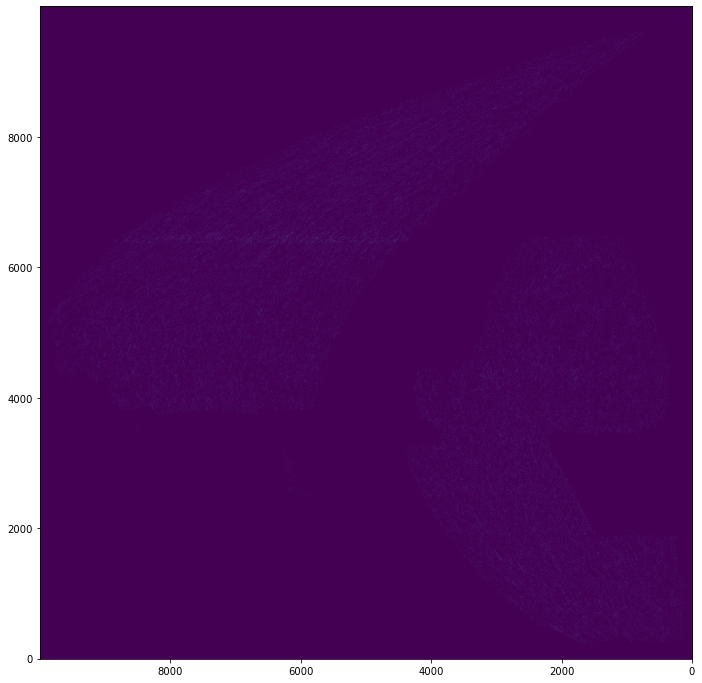

In [16]:
plt.figure(figsize = (12, 12))
plt.imshow(H, vmax = 1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [17]:
#x_scale = (x_edges.max() - x_edges.min())/(H.shape[1] - 1)
#y_scale = (y_edges.max() - y_edges.min())/(H.shape[0] - 1)
#x_scale = xedges[1]-xedges[0]
#y_scale = yedges[1]-yedges[0]
#x_scale = (np.max(data.DEC_central) - np.min(data.DEC_central))/(H.shape[1] - 1)
#y_scale = (np.max((data.RA_central-300)%360*np.cos(np.pi/180*data.DEC_central)) - np.min((data.RA_central-300)%360*np.cos(np.pi/180*data.DEC_central)))/(H.shape[1] - 1)
x_scale = (90 + 70)/(H.shape[1] - 1)
y_scale = (325+3)/(H.shape[1] - 1)

In [18]:
x_scale, y_scale

(0.016003200640128026, 0.03280656131226245)

In [19]:
dim_x = 0.285/x_scale
dim_y = 0.285/y_scale

In [20]:
dim_x, dim_y

(17.8089375, 8.687286585365854)

In [21]:
(int(np.round(dim_x*2)), np.round(dim_y*2))

(36, 17.0)

In [22]:
test = np.zeros((int(np.round(dim_x*2)+1), int(np.round(dim_y*2)+1)), dtype = "int")
x,y = np.ogrid[0:int(np.round(dim_x*2)+1), 0:int(np.round(dim_y*2)+1)]

#get the x and y center points of our image
center_x = test.shape[0]/2 - 1
center_y = test.shape[1]/2 - 1

#create a circle mask which is centered in the middle of the image, and with radius 10 pixels
circle_mask = (x-center_x)**2/(dim_x**2) + (y-center_y)**2/(dim_y**2) <= 1

test[circle_mask] = 1
kernel = test.copy()

In [23]:
center_x, center_y

(17.5, 8.0)

In [24]:
test

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

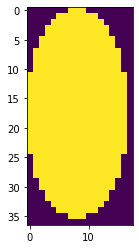

In [25]:
plt.imshow(test)
plt.show()

In [26]:
#ra_min = ((data.RA_central-300)%360*np.cos(np.pi/180*data.DEC_central)).min()
ra_min = -3
data["ra_indices"] = np.round(((data.RA_central-298)%360*np.cos(np.pi/180*data.DEC_central) - ra_min)/y_scale)
#data["dec_indices"] = np.round((data.DEC_central - data.DEC_central.min())/x_scale)
data["dec_indices"] = np.round((data.DEC_central - -70)/x_scale)

In [27]:
data[["ra_indices"]]

,ra_indices
0,3718.0
1,3772.0
2,3530.0
3,3633.0
4,3488.0
...,...
397382,8822.0
397383,8785.0
397384,8851.0
397385,8723.0


In [29]:
(data.RA_central-298)%360*np.cos(np.pi/180*data.DEC_central)

0         118.962812
1         120.755483
2         112.818708
3         116.197646
4         111.428404
             ...    
397382    286.422544
397383    285.192029
397384    287.358085
397385    283.178021
397386    283.656062
Length: 397387, dtype: float64

In [30]:
sampled = data.sample(1000, random_state = 1)
ra_list = sampled.RA_central*np.cos(np.pi/180*sampled.DEC_central)
dec_list = sampled.DEC_central

In [31]:
dec_indices = (dec_list - xedges.min())/x_scale
ra_indices = (ra_list - yedges.min())/y_scale

In [ ]:
dec_indices

378851    4577.819721
113666    5364.222088
355312    5297.649761
157351    5816.580329
258686    4712.434797
             ...     
359117    6217.090246
22949     9589.208456
147491    5209.064689
209036    5292.149890
68008     7704.631344
Name: DEC_central, Length: 1000, dtype: float64

In [ ]:
dec_list

378851     1.931009
113666    13.940652
355312    12.923984
157351    20.848897
258686     3.986800
            ...    
359117    26.965334
22949     78.463059
147491    11.571146
209036    12.839992
68008     49.682504
Name: DEC_central, Length: 1000, dtype: float64

In [134]:
xedges[4577:4600]

array([1.91849099, 1.93376262, 1.94903424, 1.96430587, 1.97957749,
       1.99484912, 2.01012074, 2.02539237, 2.04066399, 2.05593562,
       2.07120724, 2.08647887, 2.10175049, 2.11702212, 2.13229374,
       2.14756537, 2.16283699, 2.17810862, 2.19338024, 2.20865187,
       2.22392349, 2.23919512, 2.25446674])

In [131]:
ra_indices

378851    1393.834509
113666    5400.602229
355312     237.174668
157351    8445.387901
258686     377.812178
             ...     
359117    8241.669764
22949      985.810574
147491     450.189928
209036    3799.070842
68008     2299.842611
Length: 1000, dtype: float64

In [132]:
ra_list

378851     50.176854
113666    194.411335
355312      8.539744
157351    304.016661
258686     13.602373
             ...    
359117    296.683273
22949      35.488925
147491     16.207806
209036    136.759865
68008      82.791076
Length: 1000, dtype: float64

In [135]:
yedges[1393:1450]

array([50.14681406, 50.18281178, 50.21880949, 50.25480721, 50.29080492,
       50.32680264, 50.36280035, 50.39879807, 50.43479578, 50.47079349,
       50.50679121, 50.54278892, 50.57878664, 50.61478435, 50.65078207,
       50.68677978, 50.7227775 , 50.75877521, 50.79477293, 50.83077064,
       50.86676835, 50.90276607, 50.93876378, 50.9747615 , 51.01075921,
       51.04675693, 51.08275464, 51.11875236, 51.15475007, 51.19074779,
       51.2267455 , 51.26274321, 51.29874093, 51.33473864, 51.37073636,
       51.40673407, 51.44273179, 51.4787295 , 51.51472722, 51.55072493,
       51.58672265, 51.62272036, 51.65871807, 51.69471579, 51.7307135 ,
       51.76671122, 51.80270893, 51.83870665, 51.87470436, 51.91070208,
       51.94669979, 51.98269751, 52.01869522, 52.05469294, 52.09069065,
       52.12668836, 52.16268608])

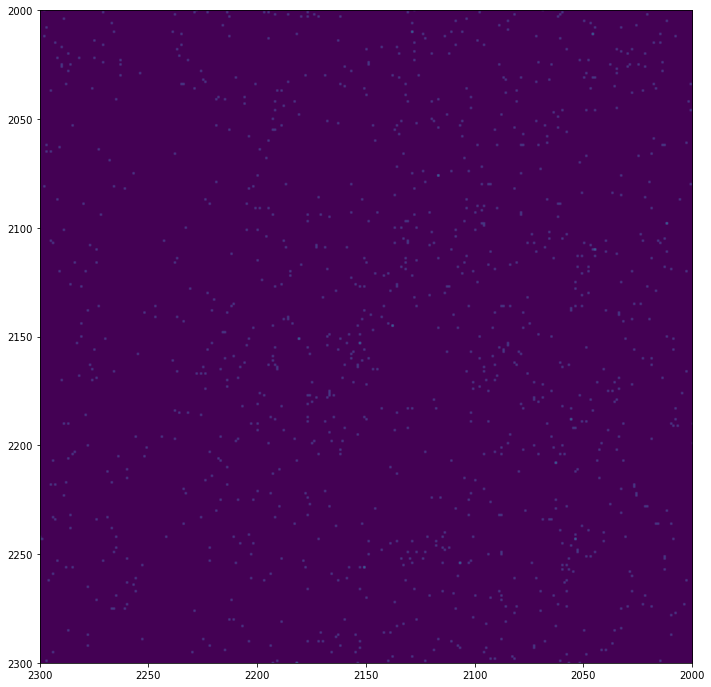

In [32]:
plt.figure(figsize = (12, 12))
plt.imshow(H)
plt.xlim(2000, 2300)
plt.ylim(2000, 2300)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [33]:
H0 = np.clip(H, 0, 1)

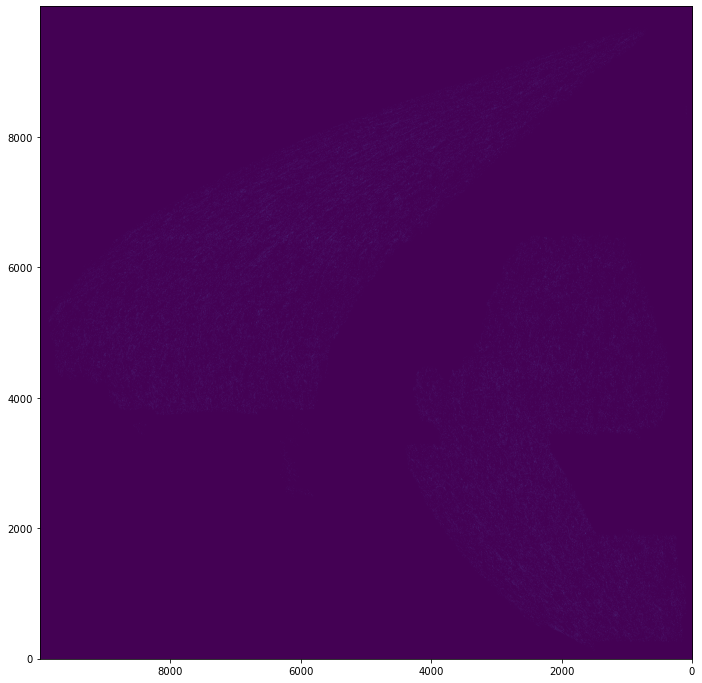

In [34]:
plt.figure(figsize = (12, 12))
plt.imshow(H0)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [35]:
kernel = test2.astype("uint8")
closing = cv.morphologyEx(H0, cv.MORPH_CLOSE, kernel)

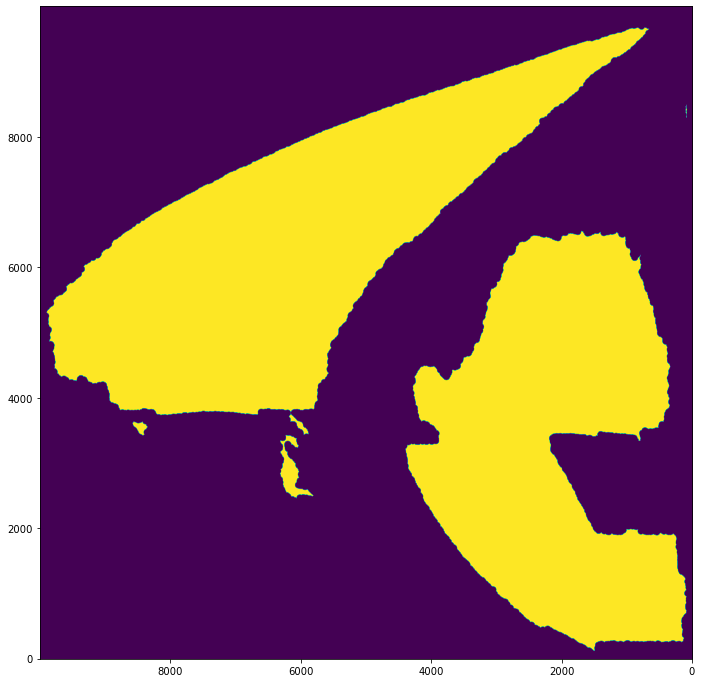

In [36]:
plt.figure(figsize = (12, 12))
plt.imshow(closing)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [37]:
kernel2 = test.astype("uint8")
eroded = cv.erode(closing, kernel2)

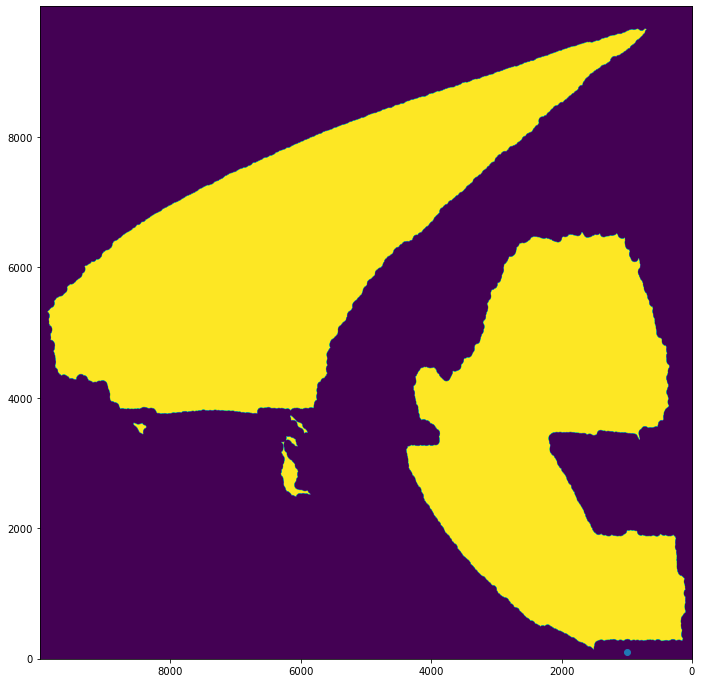

In [38]:
plt.figure(figsize = (12, 12))
plt.imshow(eroded)
plt.plot(1000, 100, 'o')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [39]:
eroded[[235, 345, 0, 1000], [456, 345, 0, 100]]

array([0., 1., 0., 0.])

In [40]:
eroded[0, 0]

0.0

In [41]:
data["edge_mask"] = eroded[data.dec_indices.astype("int").to_list(), data.ra_indices.astype("int").to_list()]

In [42]:
data2 = data[data.edge_mask == 0]
len(data2)

6570

In [45]:
H_uneq2, xedges, yedges = np.histogram2d(data2.DEC_central, (data2.RA_central-298)%360, bins = (np.linspace(np.min(data2.DEC_central), np.max(data2.DEC_central), 1000), np.linspace(np.min((data2.RA_central-298)%360), np.max((data2.RA_central-298)%360), 1000)))

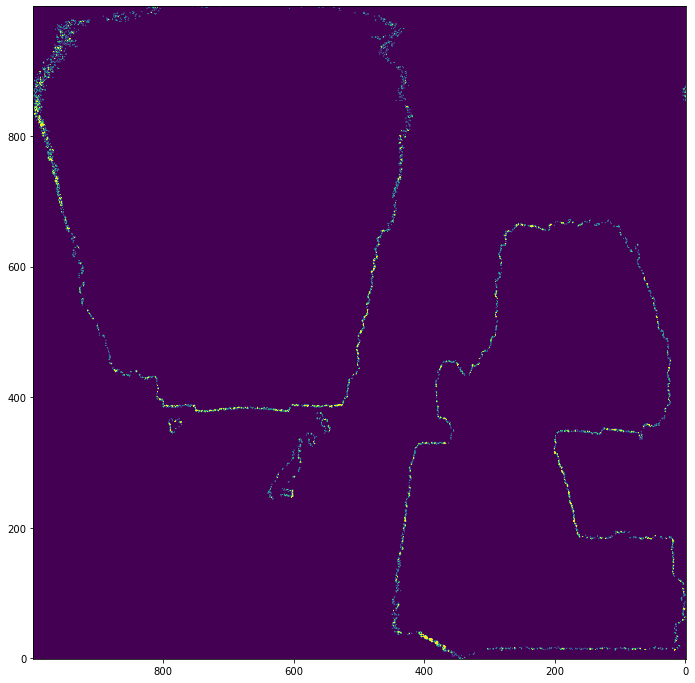

In [46]:
plt.figure(figsize = (12, 12))
plt.imshow(H_uneq2, vmax = 1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [47]:
all_clusters1 = data.copy()
saving = all_clusters1.copy().to_records(index = False)

In [48]:
fits.writeto("all_clusters4.fits", saving)

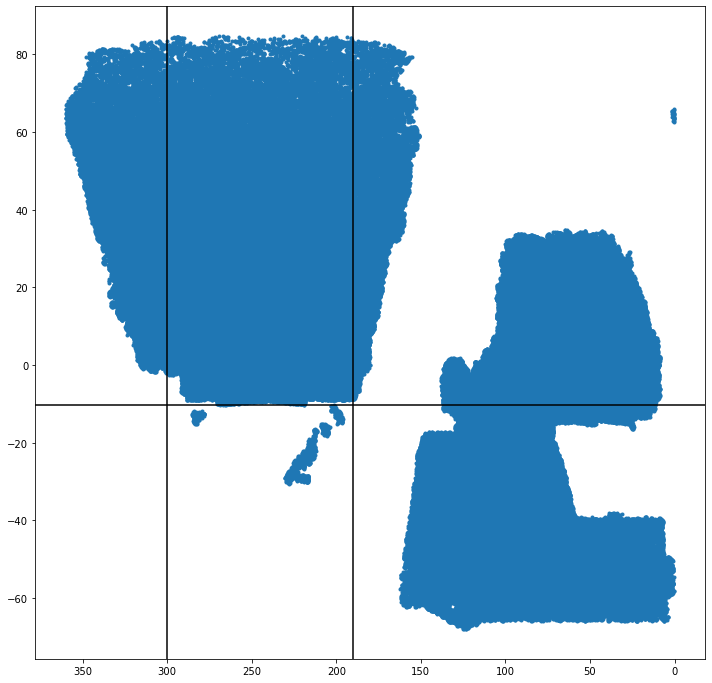

In [97]:
plt.figure(figsize = (12, 12))
plt.plot((data.RA_central-298)%360, data.DEC_central, ".")
plt.axhline(-10.3, color = "k")
plt.axvline(300, color = "k")
plt.axvline(190, color = "k")
plt.gca().invert_xaxis()